In [355]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
font = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/simkai.ttf')

In [356]:
df=pd.read_excel(r'C:\Users\stayhungary\Desktop\总重80吨以上明细2.xlsx')
# df.drop_duplicates( subset=['流水号'],inplace=True )
# df.head()

df

,地市,区县,站点名称,检测时间,车牌号码,总重,限重,超重,轴数,超限率,...,所属运输企业名称,联系电话,车籍地,流水号,入库时间,案件状态,审核意见,判定需处罚,外省抄告,area_county
0,杭州,萧山,X118（八柯线）柯桥、萧山方向K13+200,2023-11-09 04:05:36,黑G81G31,81.70,49.0,32.70,6,66.73,...,NaN,NaN,NaN,330109_BKXK13+200_33010920231109040536299174,NaN,15.0,货车逃避检测无法识别车牌,99.0,0.0,330109
1,杭州,萧山,X135（城红线）红山、坎山方向K4+000,2023-11-15 11:37:20,苏CLK627,83.55,49.0,34.55,6,70.51,...,NaN,NaN,NaN,330109_135XK4+000_33010920231115113720743287,NaN,3.0,通过,99.0,0.0,330109
2,杭州,萧山,S307（307省道）富阳、萧山方向K29+300,2023-11-11 05:34:22,浙A89D66,80.30,49.0,31.30,6,63.88,...,NaN,NaN,330109.0,3301093101_330109310120231111053422272210,NaN,4.0,通过,1.0,0.0,330109
3,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-12 03:27:36,拒识无牌,145.15,49.0,96.15,6,196.22,...,NaN,NaN,NaN,330110__1699730856888_15559689,NaN,NaN,NaN,NaN,NaN,330110
4,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-05 03:36:40,拒识无牌,86.10,36.0,50.10,4,139.17,...,NaN,NaN,NaN,330110__1699126600436_15441690,NaN,NaN,NaN,NaN,NaN,330110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,杭州,临安,S206（青山湖大桥）临安方向,2023-11-06 03:27:47,皖SE3405,86.44,49.0,37.44,6,76.41,...,NaN,NaN,NaN,3301853107_1699212468168000101,NaN,NaN,NaN,NaN,NaN,330185
308,杭州,临安,S208（桐千线）於潜方向K44+338,2023-11-05 01:28:39,无牌,89.43,49.0,40.43,6,82.53,...,NaN,NaN,NaN,3301853104_169911892119900013301853104,NaN,NaN,NaN,NaN,NaN,330185
309,杭州,临安,G329（舟鲁线）於潜方向K474+450,2023-11-14 03:26:56,无牌,85.96,49.0,36.96,6,75.43,...,NaN,NaN,NaN,3301853105_1699903618299000101,NaN,15.0,货车逃避检测无法识别车牌,99.0,0.0,330185
310,杭州,临安,S206（青山湖大桥）临安方向,2023-11-04 22:15:09,浙A08J21,90.64,43.0,47.64,5,110.79,...,NaN,NaN,NaN,3301853107_1699107311406000101,NaN,NaN,NaN,NaN,NaN,330185


In [357]:
df['检测时间']= pd.to_datetime(df['检测时间'])
df['检测时间日'] = df['检测时间'].map(lambda x:x.strftime('%d'))
df.head()

,地市,区县,站点名称,检测时间,车牌号码,总重,限重,超重,轴数,超限率,...,联系电话,车籍地,流水号,入库时间,案件状态,审核意见,判定需处罚,外省抄告,area_county,检测时间日
0,杭州,萧山,X118（八柯线）柯桥、萧山方向K13+200,2023-11-09 04:05:36,黑G81G31,81.70,49.0,32.70,6,66.73,...,NaN,NaN,330109_BKXK13+200_33010920231109040536299174,NaN,15.0,货车逃避检测无法识别车牌,99.0,0.0,330109,09
1,杭州,萧山,X135（城红线）红山、坎山方向K4+000,2023-11-15 11:37:20,苏CLK627,83.55,49.0,34.55,6,70.51,...,NaN,NaN,330109_135XK4+000_33010920231115113720743287,NaN,3.0,通过,99.0,0.0,330109,15
2,杭州,萧山,S307（307省道）富阳、萧山方向K29+300,2023-11-11 05:34:22,浙A89D66,80.30,49.0,31.30,6,63.88,...,NaN,330109.0,3301093101_330109310120231111053422272210,NaN,4.0,通过,1.0,0.0,330109,11
3,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-12 03:27:36,拒识无牌,145.15,49.0,96.15,6,196.22,...,NaN,NaN,330110__1699730856888_15559689,NaN,NaN,NaN,NaN,NaN,330110,12
4,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-05 03:36:40,拒识无牌,86.10,36.0,50.10,4,139.17,...,NaN,NaN,330110__1699126600436_15441690,NaN,NaN,NaN,NaN,NaN,330110,05


In [358]:
df['检测时间时'] = df['检测时间'].map(lambda x:x.strftime('%H'))
df.head()

,地市,区县,站点名称,检测时间,车牌号码,总重,限重,超重,轴数,超限率,...,车籍地,流水号,入库时间,案件状态,审核意见,判定需处罚,外省抄告,area_county,检测时间日,检测时间时
0,杭州,萧山,X118（八柯线）柯桥、萧山方向K13+200,2023-11-09 04:05:36,黑G81G31,81.70,49.0,32.70,6,66.73,...,NaN,330109_BKXK13+200_33010920231109040536299174,NaN,15.0,货车逃避检测无法识别车牌,99.0,0.0,330109,09,04
1,杭州,萧山,X135（城红线）红山、坎山方向K4+000,2023-11-15 11:37:20,苏CLK627,83.55,49.0,34.55,6,70.51,...,NaN,330109_135XK4+000_33010920231115113720743287,NaN,3.0,通过,99.0,0.0,330109,15,11
2,杭州,萧山,S307（307省道）富阳、萧山方向K29+300,2023-11-11 05:34:22,浙A89D66,80.30,49.0,31.30,6,63.88,...,330109.0,3301093101_330109310120231111053422272210,NaN,4.0,通过,1.0,0.0,330109,11,05
3,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-12 03:27:36,拒识无牌,145.15,49.0,96.15,6,196.22,...,NaN,330110__1699730856888_15559689,NaN,NaN,NaN,NaN,NaN,330110,12,03
4,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-05 03:36:40,拒识无牌,86.10,36.0,50.10,4,139.17,...,NaN,330110__1699126600436_15441690,NaN,NaN,NaN,NaN,NaN,330110,05,03


In [359]:
df['案件状态']=df['案件状态'].fillna('99')
df['案件状态'] = df['案件状态'].astype('int')
df.loc[df['案件状态'] == 99, '案件状态'] = '未采集'
df.loc[df['案件状态'] == 0, '案件状态'] = '审核不通过'
df.loc[df['案件状态'] == 1, '案件状态'] = '待初审'
df.loc[df['案件状态'] == 2, '案件状态'] = '待审核'
df.loc[df['案件状态'] == 3, '案件状态'] = '待判定'
df.loc[df['案件状态'] == 4, '案件状态'] = '已告知'
df.loc[df['案件状态'] == 5, '案件状态'] = '免处理'
df.loc[df['案件状态'] == 6, '案件状态'] = '已立案'
df.loc[df['案件状态'] == 12, '案件状态'] = '待告知'
df.loc[df['案件状态'] == 13, '案件状态'] = '已结案'
df.loc[df['案件状态'] == 9, '案件状态'] = '判定不处理'
df.loc[df['案件状态'] == 15, '案件状态'] = '初审不通过'
df.head()

,地市,区县,站点名称,检测时间,车牌号码,总重,限重,超重,轴数,超限率,...,车籍地,流水号,入库时间,案件状态,审核意见,判定需处罚,外省抄告,area_county,检测时间日,检测时间时
0,杭州,萧山,X118（八柯线）柯桥、萧山方向K13+200,2023-11-09 04:05:36,黑G81G31,81.70,49.0,32.70,6,66.73,...,NaN,330109_BKXK13+200_33010920231109040536299174,NaN,初审不通过,货车逃避检测无法识别车牌,99.0,0.0,330109,09,04
1,杭州,萧山,X135（城红线）红山、坎山方向K4+000,2023-11-15 11:37:20,苏CLK627,83.55,49.0,34.55,6,70.51,...,NaN,330109_135XK4+000_33010920231115113720743287,NaN,待判定,通过,99.0,0.0,330109,15,11
2,杭州,萧山,S307（307省道）富阳、萧山方向K29+300,2023-11-11 05:34:22,浙A89D66,80.30,49.0,31.30,6,63.88,...,330109.0,3301093101_330109310120231111053422272210,NaN,已告知,通过,1.0,0.0,330109,11,05
3,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-12 03:27:36,拒识无牌,145.15,49.0,96.15,6,196.22,...,NaN,330110__1699730856888_15559689,NaN,未采集,NaN,NaN,NaN,330110,12,03
4,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-05 03:36:40,拒识无牌,86.10,36.0,50.10,4,139.17,...,NaN,330110__1699126600436_15441690,NaN,未采集,NaN,NaN,NaN,330110,05,03


In [360]:
df['判定需处罚']=df['判定需处罚'].fillna('2')
df['判定需处罚'] = df['判定需处罚'].astype('int')
df.loc[df['判定需处罚'] == 2, '判定需处罚'] = '未采集'
df.loc[df['判定需处罚'] == 99, '判定需处罚'] = '初审'
df.loc[df['判定需处罚'] == 1, '判定需处罚'] = '复审'
df.head()

,地市,区县,站点名称,检测时间,车牌号码,总重,限重,超重,轴数,超限率,...,车籍地,流水号,入库时间,案件状态,审核意见,判定需处罚,外省抄告,area_county,检测时间日,检测时间时
0,杭州,萧山,X118（八柯线）柯桥、萧山方向K13+200,2023-11-09 04:05:36,黑G81G31,81.70,49.0,32.70,6,66.73,...,NaN,330109_BKXK13+200_33010920231109040536299174,NaN,初审不通过,货车逃避检测无法识别车牌,初审,0.0,330109,09,04
1,杭州,萧山,X135（城红线）红山、坎山方向K4+000,2023-11-15 11:37:20,苏CLK627,83.55,49.0,34.55,6,70.51,...,NaN,330109_135XK4+000_33010920231115113720743287,NaN,待判定,通过,初审,0.0,330109,15,11
2,杭州,萧山,S307（307省道）富阳、萧山方向K29+300,2023-11-11 05:34:22,浙A89D66,80.30,49.0,31.30,6,63.88,...,330109.0,3301093101_330109310120231111053422272210,NaN,已告知,通过,复审,0.0,330109,11,05
3,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-12 03:27:36,拒识无牌,145.15,49.0,96.15,6,196.22,...,NaN,330110__1699730856888_15559689,NaN,未采集,NaN,未采集,NaN,330110,12,03
4,杭州,余杭,G235（新海线）余杭方向K675+620,2023-11-05 03:36:40,拒识无牌,86.10,36.0,50.10,4,139.17,...,NaN,330110__1699126600436_15441690,NaN,未采集,NaN,未采集,NaN,330110,05,03


In [361]:
charts_path=r'G:\智诚\2023日常给出数据\数据分析\charts'
city='330100'
today='2023-11-22'

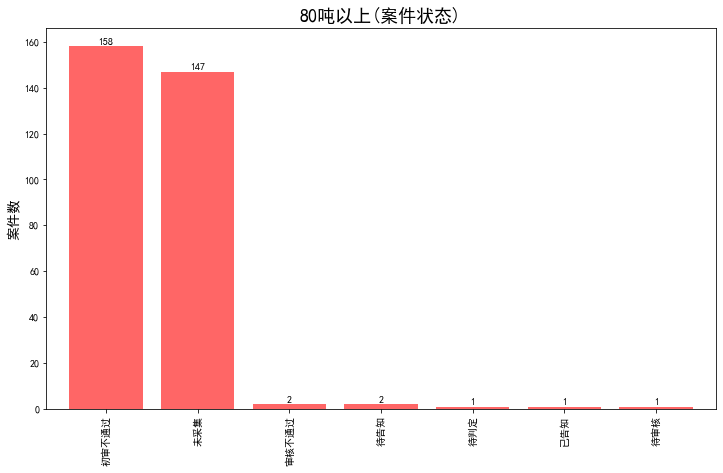

In [362]:
cor=df['案件状态'].value_counts()
# cor = cor[0:5]
x=range(len(cor.index))
name=cor.index
y=cor.values
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
plt.figure(figsize=(12,7))
# 计算各店铺的商品数量
cor.plot.bar(width=0.8,alpha=0.6,color='r')
plt.title('80吨以上(案件状态)',fontsize=18)
plt.ylabel('案件数',fontsize=14)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%d' % y,ha = 'center',va = 'bottom')
plt.savefig(r'{}\{}80吨以上(案件状态).png'.format(charts_path,city),bbox_inches='tight')
plt.show()

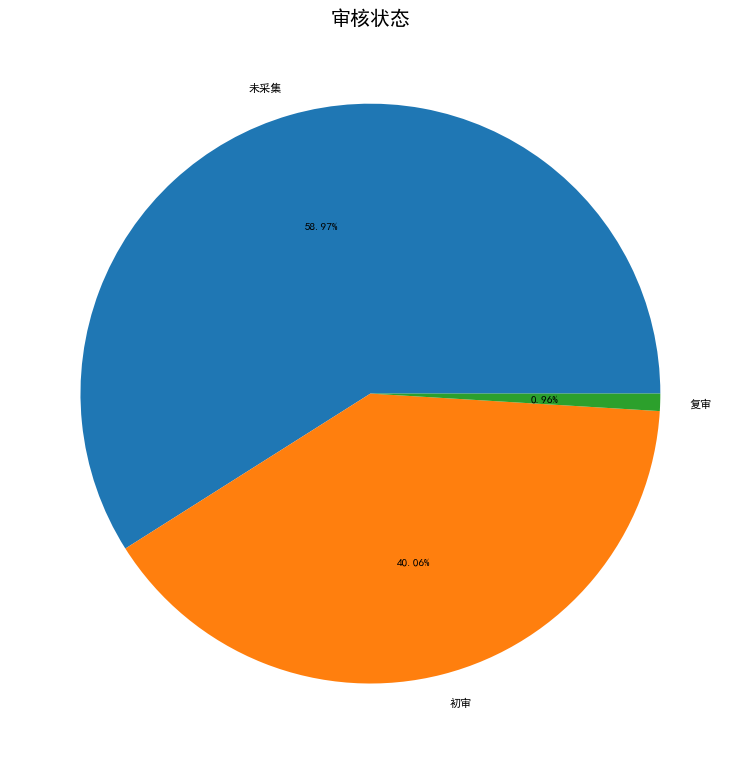

In [363]:
city_month=df['判定需处罚'].value_counts()
plt.figure(figsize=(21,12),dpi=80)
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
plt.subplot(1,1,1)
plt.pie(city_month,labels=city_month.index,autopct='%.2f%%')
# plt.legend()
plt.title('审核状态', fontsize=18)
plt.savefig(r'{}\{}审核状态.png'.format(charts_path,city),bbox_inches='tight')
plt.show()

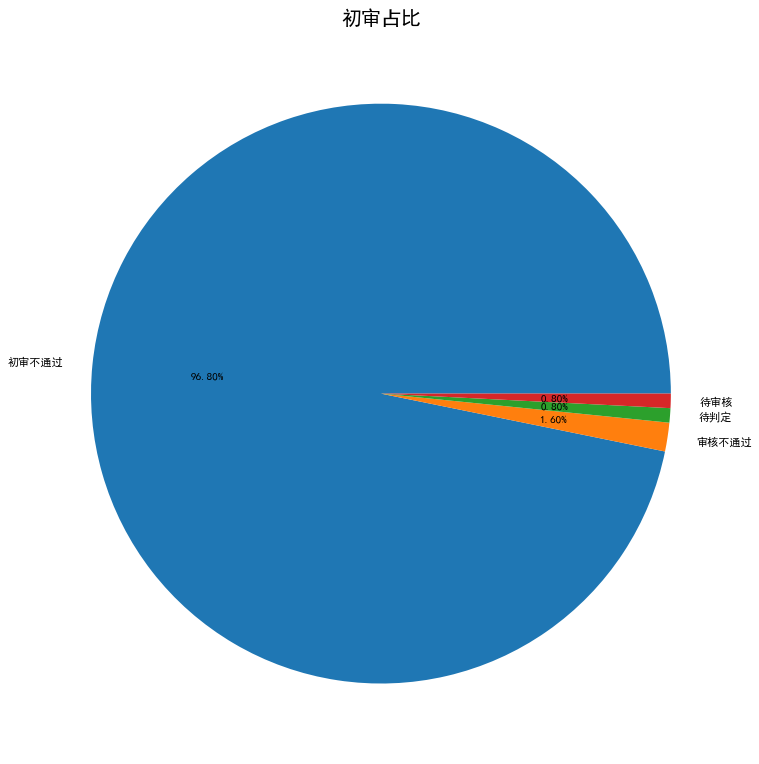

In [364]:
city_month=df[df['判定需处罚']=='初审']['案件状态'].value_counts()
plt.figure(figsize=(21,12),dpi=80)
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
plt.subplot(1,1,1)
plt.pie(city_month,labels=city_month.index,autopct='%.2f%%')
# plt.legend()
plt.title('初审占比', fontsize=18)
plt.savefig(r'{}\{}初审占比.png'.format(charts_path,city),bbox_inches='tight')
plt.show()

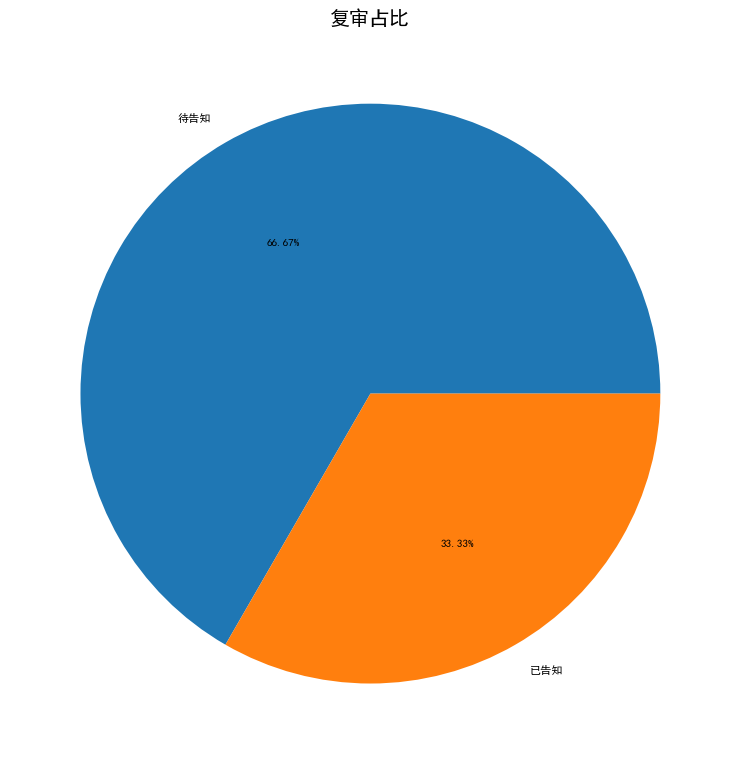

In [365]:
city_month=df[df['判定需处罚']=='复审']['案件状态'].value_counts()
plt.figure(figsize=(21,12),dpi=80)
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
plt.subplot(1,1,1)
plt.pie(city_month,labels=city_month.index,autopct='%.2f%%')
# plt.legend()
plt.title('复审占比', fontsize=18)
plt.savefig(r'{}\{}复审占比.png'.format(charts_path,city),bbox_inches='tight')
plt.show()


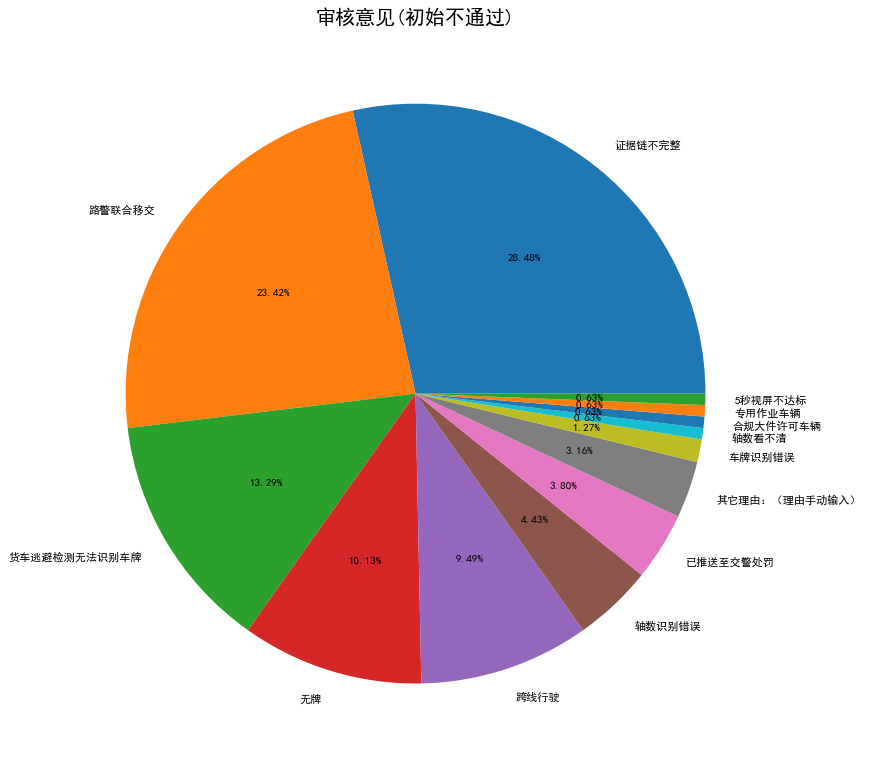

In [366]:
city_month=df[df['案件状态']=='初审不通过']['审核意见'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(21,12),dpi=80)
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
plt.subplot(1,1,1)
plt.pie(city_month,labels=city_month.index,autopct='%.2f%%')
# plt.legend()
plt.title('审核意见(初始不通过)', fontsize=18)
plt.savefig(r'{}\{}审核意见(初始不通过).png'.format(charts_path,city),bbox_inches='tight')
plt.show()

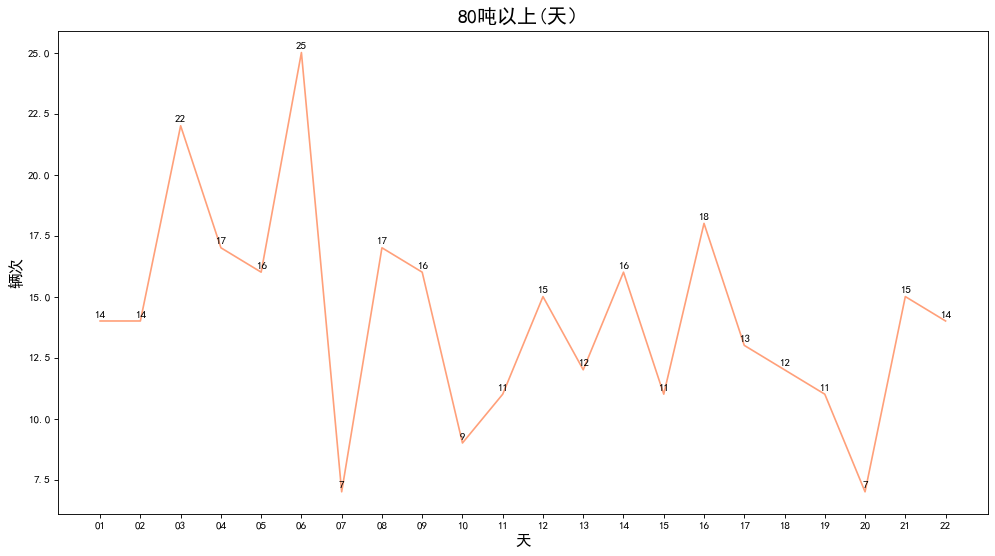

In [367]:
# city_month=df['检测时间日'].value_counts().sort_index()
city_month=df['检测时间日'].value_counts().sort_index()
name=city_month.index
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
x=list(range(len(city_month.index)))
y=city_month.values
width=0.3
plt.figure(figsize=(15,8),dpi=80)
plt.plot(x,y,color='lightsalmon')
plt.xticks(x,name)
# plt.legend()
plt.xlabel('天', fontsize=14)
plt.ylabel('辆次', fontsize=14)
plt.title('80吨以上(天）',fontsize=18)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%d' % y,ha = 'center',va = 'bottom')
plt.savefig(r'{}\{}80吨以上(天）.png'.format(charts_path,city),bbox_inches='tight')
# plt.xlabel(u'日', fontproperties=font) # 添加中文字符串

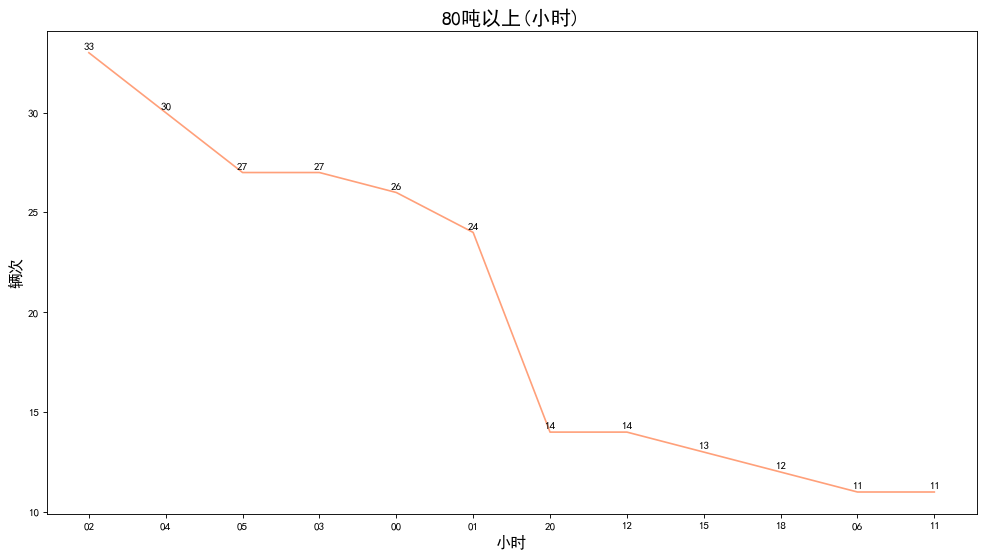

In [368]:
city_month=df['检测时间时'].value_counts()
city_month = city_month[0:12]
name=city_month.index
x=list(range(len(city_month.index)))
y=city_month.values
width=0.3
plt.figure(figsize=(15,8),dpi=80)
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
plt.plot(x,y,color='lightsalmon')
plt.xticks(x,name)
# plt.legend()
plt.xlabel('小时',fontsize=14)
plt.ylabel('辆次',fontsize=14)
plt.title('80吨以上(小时)', fontsize=18)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%d' % y,ha = 'center',va = 'bottom')
plt.savefig(r'{}\{}80吨以上(小时).png'.format(charts_path,city),bbox_inches='tight')
# plt.xlabel(u'日', fontproperties=font) # 添加中文字符串

In [369]:
# city_month=df['检测时间时'].value_counts()
# plt.figure(figsize=(21,12),dpi=80)
# plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
# plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
# plt.subplot(1,1,1)
# plt.pie(city_month,labels=city_month.index,autopct='%.2f%%')
# # plt.legend()
# plt.title('80吨以上(小时占比)', fontproperties=font,fontsize=18)
# plt.savefig(r'{}\{}80吨以上(小时占比).png'.format(charts_path,city),bbox_inches='tight')
# plt.show()

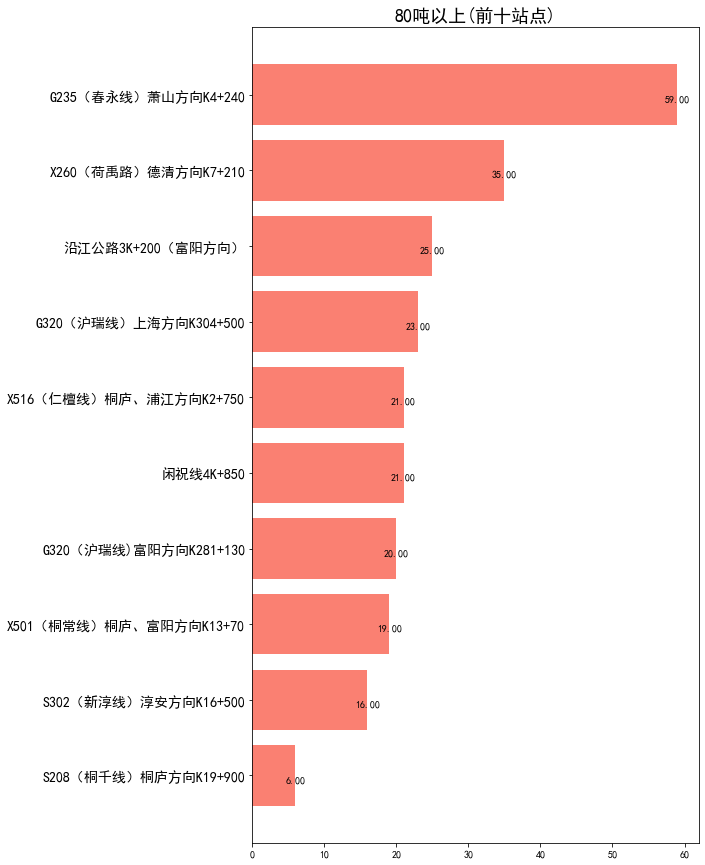

In [370]:
cor=df['站点名称'].value_counts().sort_values(ascending=False)
cor = cor[0:10]
cor=cor.sort_values(ascending=True)
plt.figure(figsize=(8,15))
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
x=range(len(cor.index))
name=cor.index
y=cor.values
plt.barh(x,y,color='salmon')
plt.yticks(x,name,fontsize=14)
for x,y in zip(x,y):
    plt.text(y,x-0.1,'%.2f' % y,ha = 'center',va = 'bottom')
# plt.ylabel('站点名称', fontproperties=font)
plt.title('80吨以上(前十站点)', fontsize=18)
plt.savefig(r'{}\{}80吨以上(前十站点).png'.format(charts_path,city),bbox_inches='tight')
plt.show()

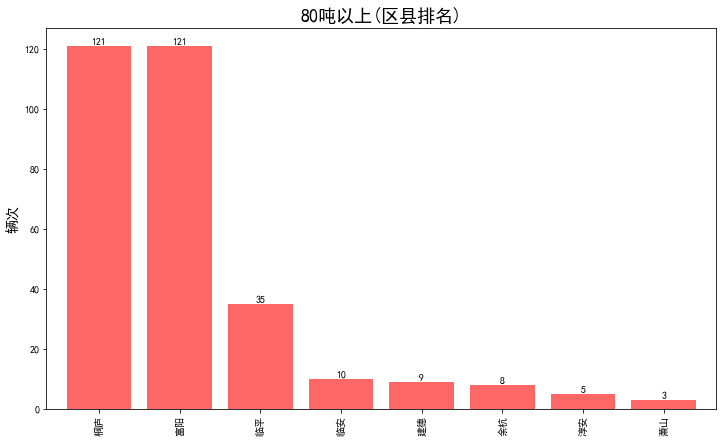

In [371]:
cor=df['区县'].value_counts().sort_values(ascending=False)
# cor = cor[0:5]
x=range(len(cor.index))
name=cor.index
y=cor.values
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
plt.figure(figsize=(12,7))
# 计算各店铺的商品数量
cor.plot.bar(width=0.8,alpha=0.6,color='r')
plt.title('80吨以上(区县排名)',fontsize=18)
plt.ylabel('辆次',fontsize=14)
for x,y in zip(x,y):
    plt.text(x,y+0.1,'%d' % y,ha = 'center',va = 'bottom')
plt.savefig(r'{}\{}80吨以上(区县排名).png'.format(charts_path,city),bbox_inches='tight')
plt.show()

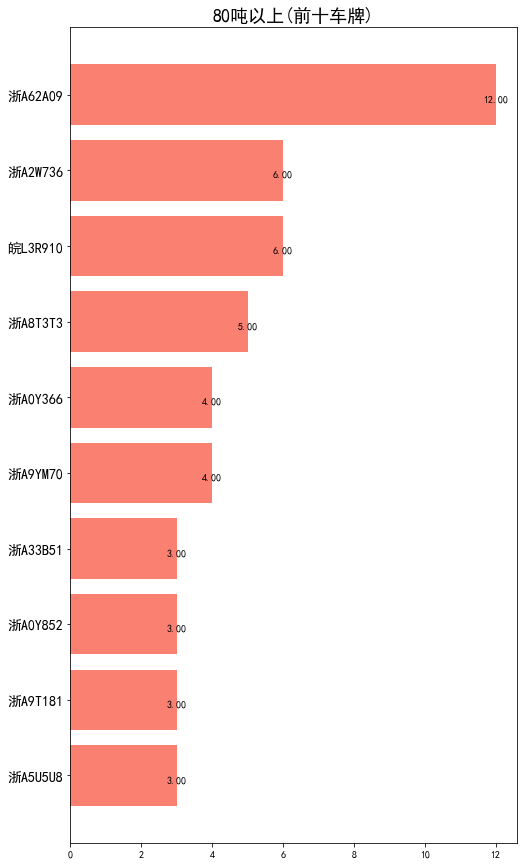

In [372]:
cor=df[(~((df['车牌号码'].str.contains("牌") == True)))&(~((df['车牌号码'].str.contains("-") == True)))&(~((df['车牌号码'].str.contains("未") == True)))]['车牌号码'].value_counts().sort_values(ascending=False)
cor = cor[0:10]
cor=cor.sort_values(ascending=True)
plt.figure(figsize=(8,15))
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
x=range(len(cor.index))
name=cor.index
y=cor.values
plt.barh(x,y,color='salmon')
plt.yticks(x,name,fontsize=14)
for x,y in zip(x,y):
    plt.text(y,x-0.1,'%.2f' % y,ha = 'center',va = 'bottom')
# plt.ylabel('站点名称', fontproperties=font)
plt.title('80吨以上(前十车牌)', fontsize=18)
plt.savefig(r'{}\{}80吨以上(前十车牌).png'.format(charts_path,city),bbox_inches='tight')
plt.show()

In [373]:
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Let's use the hello_world spreadsheet since it has less data
workbook = load_workbook(filename=r"C:\Users\stayhungary\Desktop\bar_chart_logo (1).xlsx")
sheet = workbook.active

image_indices = list(range(len(sheet._images)))

# 倒序遍历索引列表并删除图片对象
for index in reversed(image_indices):
    del sheet._images[index]


logo = Image(r'{}\{}80吨以上(天）.png'.format(charts_path,city))
logo.height = 600
logo.width = 1050
sheet.add_image(logo, "A1")
logo = Image(r'{}\{}80吨以上(小时).png'.format(charts_path,city))
logo.height = 600
logo.width = 1050
sheet.add_image(logo, "Q1")

logo = Image(r'{}\{}80吨以上(区县排名).png'.format(charts_path,city))
logo.height = 600
logo.width = 1050
sheet.add_image(logo, "A33")
logo = Image(r'{}\{}80吨以上(案件状态).png'.format(charts_path,city))
logo.height = 600
logo.width = 1050
sheet.add_image(logo, "Q33")

logo = Image(r'{}\{}审核状态.png'.format(charts_path,city))
logo.height = 900
logo.width = 900
sheet.add_image(logo, "B66")
logo = Image(r'{}\{}初审占比.png'.format(charts_path,city))
logo.height = 900
logo.width = 900
sheet.add_image(logo, "Q66")

logo = Image(r'{}\{}复审占比.png'.format(charts_path,city))
logo.height = 900
logo.width = 900
sheet.add_image(logo, "B115")
logo = Image(r'{}\{}审核意见(初始不通过).png'.format(charts_path,city))
logo.height = 1000
logo.width = 1100
sheet.add_image(logo, "Q110")


logo = Image(r'{}\{}80吨以上(前十站点).png'.format(charts_path,city))
logo.height = 1000
logo.width = 900
sheet.add_image(logo, "A163")
logo = Image(r'{}\{}80吨以上(前十车牌).png'.format(charts_path,city))
logo.height = 1000
logo.width = 700
sheet.add_image(logo, "Q163")


workbook.save(filename=r"C:\Users\stayhungary\Desktop\bar_chart_logo (1).xlsx")